### Example Jupyter Notebook

#### Sample network topology with 3 Arista Nodes and 2 Hosts.
##### OSPF and BGP are running in the environment.

##### Configuration files are stored in "networks/arista/configs"

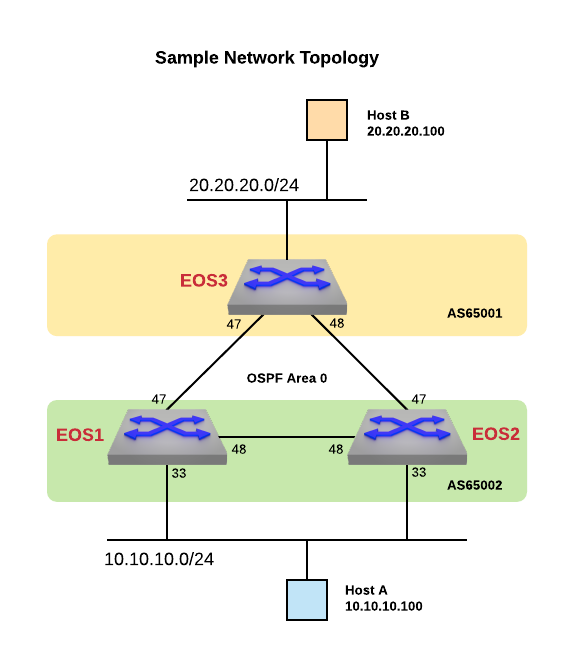

### Initialize Snapshot

In [1]:
# Import packages and load questions
%run startup.py
load_questions()

# Global VARs
NETWORK_NAME = "aristalab_network"
SNAPSHOT_NAME = "aristalab_snapshot"
SNAPSHOT_PATH = "networks/arista"

# Initialize a network and snapshot
bf_set_network(NETWORK_NAME)
bf_init_snapshot(SNAPSHOT_PATH, name=SNAPSHOT_NAME, overwrite=True)


'aristalab_snapshot'

### Parse Config Files

In [2]:
# Parse Files for correctness
result = bfq.fileParseStatus().answer().frame()
result

,File_Name,Status,Nodes
0,configs/eos1.cfg,PASSED,['eos1']
1,configs/eos2.cfg,PASSED,['eos2']
2,configs/eos3.cfg,PASSED,['eos3']


### List all interfaces with an IP address assigned

In [3]:
# What interfaces have IP addresses assigned to them across all nodes
ip_owners_ans = bfq.ipOwners().answer().frame()
ip_owners_ans

,Node,VRF,Interface,IP,Mask,Active
0,eos1,default,Ethernet33,10.10.10.2,24,True
1,eos2,default,Ethernet48,10.0.0.10,30,True
2,eos1,default,Loopback100,100.100.100.1,32,True
3,eos3,MGMT,Management1,192.168.1.252,24,False
4,eos3,default,Loopback100,100.100.100.3,32,True
5,eos1,default,Ethernet47,10.0.0.2,30,False
6,eos2,default,Loopback0,1.1.1.2,32,True
7,eos1,MGMT,Management1,192.168.1.250,24,False
8,eos2,default,Loopback100,100.100.100.2,32,True
9,eos2,default,Ethernet47,10.0.0.6,30,True


### Unused Structures - ACLs, Route-Maps, Prefix-Lists, etc...

In [4]:
result = bfq.unusedStructures().answer().frame()
result

,Structure_Type,Structure_Name,Source_Lines
0,extended ipv4 access-list,ACL_TESTING,"configs/eos1.cfg:[183, 184]"


### VLAN Properties

In [5]:
result = bfq.switchedVlanProperties().answer().frame()
result

,Node,VLAN_ID,Interfaces,VXLAN_VNI
0,eos3,10,"[eos3[Ethernet1], eos3[Ethernet33], eos3[Ethernet34]]",None
1,eos3,20,"[eos3[Ethernet2], eos3[Vlan20]]",None


### Find interfaces configured for Jumbo Frames

In [7]:
result = bfq.interfaceMtu(mtuBytes=1500, comparator='>').answer().frame()
result

,Interface,MTU
0,eos1[Ethernet38],5000
1,eos2[Ethernet4],9214


### OSPF Interface Neighbor Status

In [8]:
# Fix interface type mismatches
result = bfq.ospfSessionCompatibility().answer().frame()
result

,Interface,VRF,IP,Area,Remote_Interface,Remote_VRF,Remote_IP,Remote_Area,Session_Status
0,eos1[Ethernet48],default,10.0.0.9,0,eos2[Ethernet48],default,10.0.0.10,0,ESTABLISHED
1,eos2[Ethernet47],default,10.0.0.6,0,eos3[Ethernet48],default,10.0.0.5,0,ESTABLISHED
2,eos2[Ethernet48],default,10.0.0.10,0,eos1[Ethernet48],default,10.0.0.9,0,ESTABLISHED
3,eos3[Ethernet48],default,10.0.0.5,0,eos2[Ethernet47],default,10.0.0.6,0,ESTABLISHED


### BGP Sessions

In [9]:
result = bfq.bgpSessionCompatibility().answer().frame()
result

,Node,VRF,Local_AS,Local_Interface,Local_IP,Remote_AS,Remote_Node,Remote_Interface,Remote_IP,Address_Families,Session_Type,Configured_Status
0,eos1,default,65002,None,10.0.0.2,65001,None,None,10.0.0.1,[],EBGP_SINGLEHOP,INVALID_LOCAL_IP
1,eos1,default,65002,None,10.0.0.9,65002,eos2,None,10.0.0.10,['IPV4_UNICAST'],IBGP,UNIQUE_MATCH
2,eos2,default,65002,None,10.0.0.6,65001,eos3,None,10.0.0.5,['IPV4_UNICAST'],EBGP_SINGLEHOP,UNIQUE_MATCH
3,eos2,default,65002,None,10.0.0.10,65002,eos1,None,10.0.0.9,['IPV4_UNICAST'],IBGP,UNIQUE_MATCH
4,eos3,default,65001,None,10.0.0.1,65002,None,None,10.0.0.2,[],EBGP_SINGLEHOP,UNKNOWN_REMOTE
5,eos3,default,65001,None,10.0.0.5,65002,eos2,None,10.0.0.6,['IPV4_UNICAST'],EBGP_SINGLEHOP,UNIQUE_MATCH


### Show route table

In [22]:
# Get Route Table from EOS
# Change Admin distance in BGP config to "distance bgp 200 200 200" and rerun
# OSPF routes will prevail after changing BGP admin distance
allRoutes = bfq.routes(nodes='/eos/').answer().frame()
allRoutes

,Node,VRF,Network,Next_Hop,Next_Hop_IP,Next_Hop_Interface,Protocol,Metric,Admin_Distance,Tag
0,eos2,default,100.100.100.3/32,eos3,10.0.0.5,dynamic,ospfE2,10,110,None
1,eos2,default,100.100.100.1/32,eos1,10.0.0.9,dynamic,ospfE2,10,110,None
2,eos3,default,20.20.20.1/32,None,AUTO/NONE(-1l),Vlan20,local,0,0,None
3,eos2,default,10.0.0.8/30,None,AUTO/NONE(-1l),Ethernet48,connected,0,0,None
4,eos1,default,1.1.1.3/32,eos2,10.0.0.10,dynamic,ospfE2,10,110,None
5,eos3,default,1.1.1.1/32,eos2,10.0.0.6,dynamic,ospf,3,110,None
6,eos1,default,100.100.100.2/32,eos2,10.0.0.10,dynamic,ospfE2,10,110,None
7,eos3,default,10.0.0.5/32,None,AUTO/NONE(-1l),Ethernet48,local,0,0,None
8,eos1,default,10.0.0.4/30,eos2,10.0.0.10,dynamic,ospf,2,110,None
9,eos2,default,10.10.10.0/24,None,AUTO/NONE(-1l),Ethernet33,connected,0,0,None


In [23]:
# Group all routes by Node and filter for those that don't have '99.99.99.99/32'
routes_filtered = allRoutes.groupby('Node').filter(lambda x: all(x['Network'] != '99.99.99.99/32'))

# Get the unique node names who do not have route '99.99.99.99/32'
sorted(routes_filtered["Node"].unique())

['eos2', 'eos3']

### BGP Prefix Tracer Examples

In [13]:
# prefix initiated on EOS1 - filtered with route-map
result = bfq.prefixTracer(prefix='99.99.99.99/32').answer().frame()
result

,Node,VRF,Peer,Action,Prefix
0,eos1,default,eos2,filtered_out,99.99.99.99/32


In [14]:
# Another prefix 
result = bfq.prefixTracer(prefix='20.20.20.0/24').answer().frame()
result

,Node,VRF,Peer,Action,Prefix
0,eos1,default,eos2,filtered_out,20.20.20.0/24
1,eos2,default,eos1,filtered_out,20.20.20.0/24
2,eos2,default,eos1,sent,20.20.20.0/24
3,eos2,default,eos3,received,20.20.20.0/24
4,eos3,default,eos2,filtered_in,20.20.20.0/24
5,eos2,default,eos3,filtered_out,20.20.20.0/24
6,eos1,default,eos2,received,20.20.20.0/24
7,eos2,default,eos3,sent,20.20.20.0/24
8,eos3,default,eos2,sent,20.20.20.0/24


### Traceroute Example

In [15]:
# Traceroute from 10.10.10.100 --->  20.20.20.100 with packet arriving on EOS1 port Et33
# demo by shutting down EOS1 port E47 and re-run Traceroute
result = bfq.traceroute(startLocation='@enter(eos1[Ethernet33])', headers=HeaderConstraints(dstIps='20.20.20.100', srcIps='10.10.10.100')).answer().frame()
result

,Flow,Traces,TraceCount
0,start=eos1 interface=Ethernet33 [10.10.10.100:49152->20.20.20.100:33434 UDP length=512],"[((RECEIVED(Ethernet33), FORWARDED(ARP IP: 10.0.0.10, Output Interface: Ethernet48, Routes: [ospfE2 (Network: 20.20.20.0/24, Next Hop IP:10.0.0.10)]), TRANSMITTED(Ethernet48)), (RECEIVED(Ethernet48), FORWARDED(ARP IP: 10.0.0.5, Output Interface: Ethernet47, Routes: [ospfE2 (Network: 20.20.20.0/24, Next Hop IP:10.0.0.5)]), TRANSMITTED(Ethernet47)), (RECEIVED(Ethernet48), FORWARDED(ARP IP: AUTO/NONE(-1l), Output Interface: Vlan20, Routes: [connected (Network: 20.20.20.0/24, Next Hop IP:AUTO/NONE(-1l))]), TRANSMITTED(Vlan20), DELIVERED_TO_SUBNET(Output Interface: Vlan20, Resolved Next Hop IP: 20.20.20.100)))]",1
